# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user --no-warn-script-location

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [2]:
# import libraries
import numpy as np                                # library for numerical computing and array
import pandas as pd                               # library for data manipulation and analysis
import matplotlib.pyplot as plt                   # library for creating visual plots
import seaborn as sns                             # library for statistical data visualization

### Understanding the structure of the data by loading and previewing

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
# read Data into DataFrame from Mounted Drive
df = pd.read_csv('foodhub_order.csv')

In [5]:
# Display the first 5 rows of the DataFrame to preview its structure and content
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Check the dimensions of the DataFrame to understand its size
df.shape

(1898, 9)

#### Observations: There are 1,898 rows and 9 columns in this data


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Display DataFrame summary to check data types and non-null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


#### Observations: There are 1,898 records. There are 9 columns. There are columns with integers, 4 of them (int64), columns with strings, 4 of them (object), and  column with floats, 1 of them (float64). The columns order_id and customer_id appear to have numerical values uniquely associated with an order and a customer respectively. The column restaurant_name appears to be related to the restaurant the order was made at. The column cuisine_type appears to be a category of food type. The column cost_of_the_order appears to be a value associated with the cost of the order. The column day_of_the_week also appears to be a categorical value indicating whether the order occurred during the week on a weekday or on the weekend. The column 'rating' has what appears to be numeric values in a string type. The use of the string for a numerical value appears to be because missing values are stored as 'Not given'. The last two columns appear to be time values measured in minutes of the food_preparation_time and delivery_time.


### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

In [8]:
# Identify columns with missing values and their total counts
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


#### Observations: No missing values. It should be noted that earlier preview of the data indicated that in the column 'rating' there are values provided 'Not given'. These values would indicate although the column is populated with the string 'Not given', there is a missing ratings for these records. Should transform the column to allow the analysis of the column for its intended purpose of rating/measuring the quality of the order.

In [9]:
# Replace 'Not given' in the 'rating' column with NaN for easier handling of missing data
df['rating'] = df['rating'].replace(['Not given'],np.nan)

# Convert the 'rating' column to float type for numerical analysis
df['rating'] = df['rating'].astype(float)

# Calculate the total number of missing values in each column to assess data completeness
df.isnull().sum()

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,736
food_preparation_time,0
delivery_time,0


#### Observations: To deal with the missing values I replaced the instances of 'Not given' with 'nan' and updated the column to a float type. There are now 736 rows missing a rating which is what is expected given the prior query


### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [10]:
# Generate descriptive statistics for all columns to understand data distribution and summary
df.describe()

,order_id,customer_id,cost_of_the_order,rating,food_preparation_time,delivery_time
count,1.898000e+03,1898.000000,1898.000000,1162.000000,1898.000000,1898.000000
mean,1.477496e+06,171168.478398,16.498851,4.344234,27.371970,24.161749
std,5.480497e+02,113698.139743,7.483812,0.741478,4.632481,4.972637
min,1.476547e+06,1311.000000,4.470000,3.000000,20.000000,15.000000
25%,1.477021e+06,77787.750000,12.080000,4.000000,23.000000,20.000000
50%,1.477496e+06,128600.000000,14.140000,5.000000,27.000000,25.000000
75%,1.477970e+06,270525.000000,22.297500,5.000000,31.000000,28.000000
max,1.478444e+06,405334.000000,35.410000,5.000000,35.000000,33.000000


#### Observations:

*   order_id and customer_id identify the order and customer respectively
*   average cost of an order is around $ 16.50
*   average rating is 4.34 and the lowest rating is 3 (no 1's or 2's), largest is 5
*   food preparation takes from 20 to 35 minutes, with an average of 27.4
*   delivery time takes from 15 to 33 minutes, with an average of 24.2




### **Question 5:** How many orders are not rated? [1 mark]

In [11]:
# Count the occurrences of each unique value in the 'rating' column to analyze its distribution
df['rating'].value_counts(dropna=False)

,rating
NaN,736
5.0,588
4.0,386
3.0,188


#### Observations: There are 736 orders where a rating was not given.


### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Note: Since we want to perform the same exploration for all variables, lets create a function to perform the exploration so we can reuse the code.

In [12]:
# function to explore a variable's unique values, missing values, descriptive statistics, and value counts
def explore_column(df, column_name):
    print(f"Exploring column: {column_name}")
    print("Unique Values:", df[column_name].nunique())
    print("Missing Values:", df[column_name].isnull().sum())
    print("Descriptive Stats:\n", df[column_name].describe())
    print("Value Counts:\n", df[column_name].value_counts().head(10))

**OrderId:**

In [13]:
explore_column(df, 'order_id')

Exploring column: order_id
Unique Values: 1898
Missing Values: 0
Descriptive Stats:
 count    1.898000e+03
mean     1.477496e+06
std      5.480497e+02
min      1.476547e+06
25%      1.477021e+06
50%      1.477496e+06
75%      1.477970e+06
max      1.478444e+06
Name: order_id, dtype: float64
Value Counts:
 1477147    1
1477697    1
1477555    1
1478028    1
1478308    1
1477152    1
1477053    1
1476697    1
1477982    1
1478175    1
Name: order_id, dtype: int64


#### Observations for OrderId: 1898 unique values with no missing

**CustomerId:**

In [14]:
explore_column(df, 'customer_id')

Exploring column: customer_id
Unique Values: 1200
Missing Values: 0
Descriptive Stats:
 count      1898.000000
mean     171168.478398
std      113698.139743
min        1311.000000
25%       77787.750000
50%      128600.000000
75%      270525.000000
max      405334.000000
Name: customer_id, dtype: float64
Value Counts:
 52832     13
47440     10
83287      9
250494     8
259341     7
82041      7
65009      7
276192     7
97079      6
97991      6
Name: customer_id, dtype: int64


#### Observations for CustomerId: 1200 unique values with no missing. This would indicate that there are instances where a customer has multiple orders, e.g. customer 52832 is your biggest customer with 13 orders.

**Restaurant:**

In [15]:
explore_column(df, 'restaurant_name')

Exploring column: restaurant_name
Unique Values: 178
Missing Values: 0
Descriptive Stats:
 count            1898
unique            178
top       Shake Shack
freq              219
Name: restaurant_name, dtype: object
Value Counts:
 Shake Shack                      219
The Meatball Shop                132
Blue Ribbon Sushi                119
Blue Ribbon Fried Chicken         96
Parm                              68
RedFarm Broadway                  59
RedFarm Hudson                    55
TAO                               49
Han Dynasty                       46
Blue Ribbon Sushi Bar & Grill     44
Name: restaurant_name, dtype: int64


#### Observations for Restaurant: 178 unique values with no missing. Shake Shack is the restaurant with the most orders with a count of 219.

**Cuisine**

In [16]:
explore_column(df, 'cuisine_type')

Exploring column: cuisine_type
Unique Values: 14
Missing Values: 0
Descriptive Stats:
 count         1898
unique          14
top       American
freq           584
Name: cuisine_type, dtype: object
Value Counts:
 American          584
Japanese          470
Italian           298
Chinese           215
Mexican            77
Indian             73
Middle Eastern     49
Mediterranean      46
Thai               19
French             18
Name: cuisine_type, dtype: int64


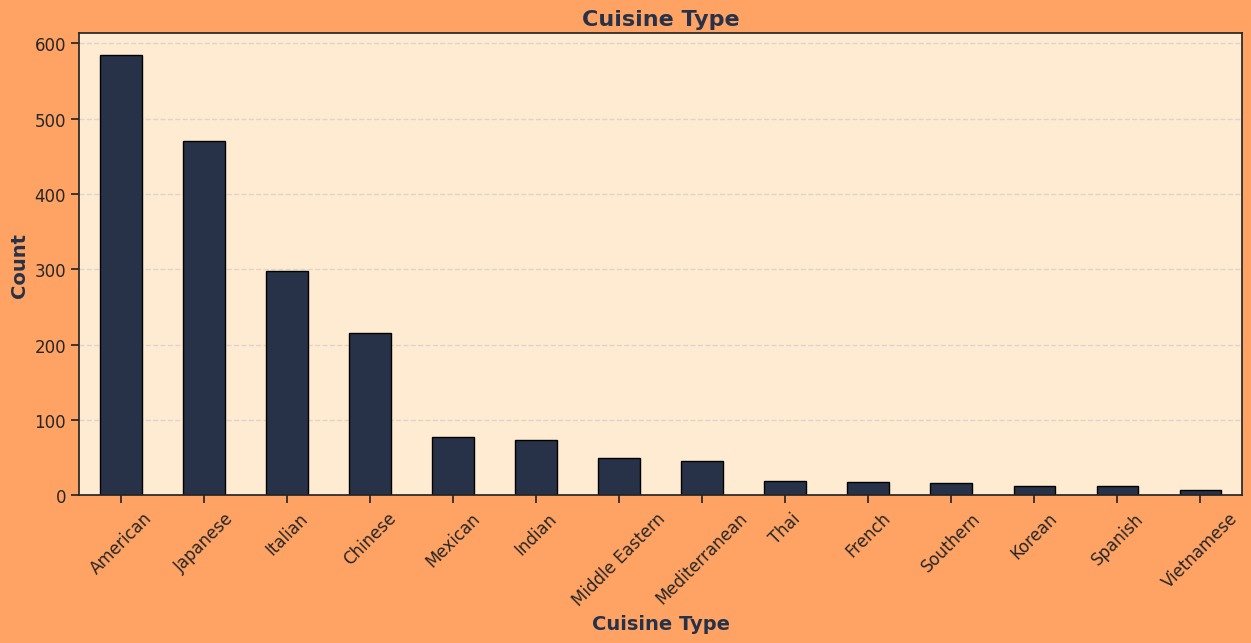

In [17]:
# Set style for the plot
sns.set(style="ticks")

# Set figure size to accommodate all categories
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create the bar plot with styling
barplot = df['cuisine_type'].value_counts().plot(
    kind='bar',
    color='#273248',  # Bar color
    edgecolor='black',  # Add edges for clarity
    title='Cuisine Type'
)

# Add labels and title
barplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Cuisine Type', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Cuisine Type', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels with styling
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()


#### Observations for Cuisine: 14 unique values with no missing. American is the top cuisine with 584 orders, Japanese, Italian and Chinese follow. Vietnamese and Spanish are the least popular.

**Order Cost**

In [18]:
explore_column(df, 'cost_of_the_order')

Exploring column: cost_of_the_order
Unique Values: 312
Missing Values: 0
Descriptive Stats:
 count    1898.000000
mean       16.498851
std         7.483812
min         4.470000
25%        12.080000
50%        14.140000
75%        22.297500
max        35.410000
Name: cost_of_the_order, dtype: float64
Value Counts:
 12.18    86
12.13    82
12.23    47
24.20    42
29.10    37
24.25    36
12.08    36
24.30    35
14.07    32
29.15    30
Name: cost_of_the_order, dtype: int64


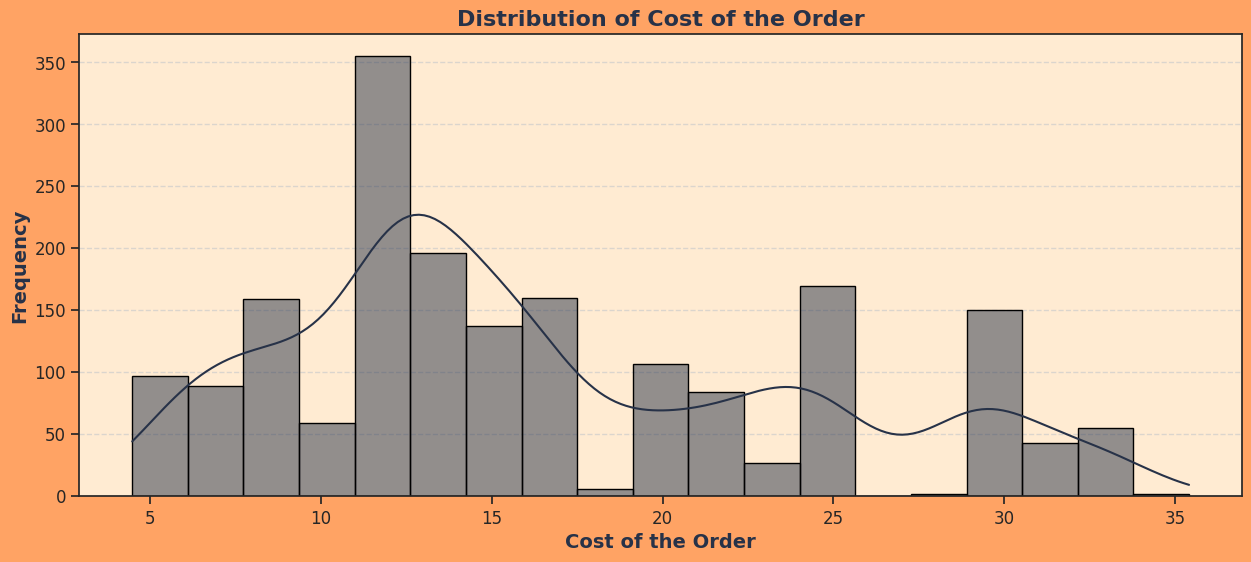

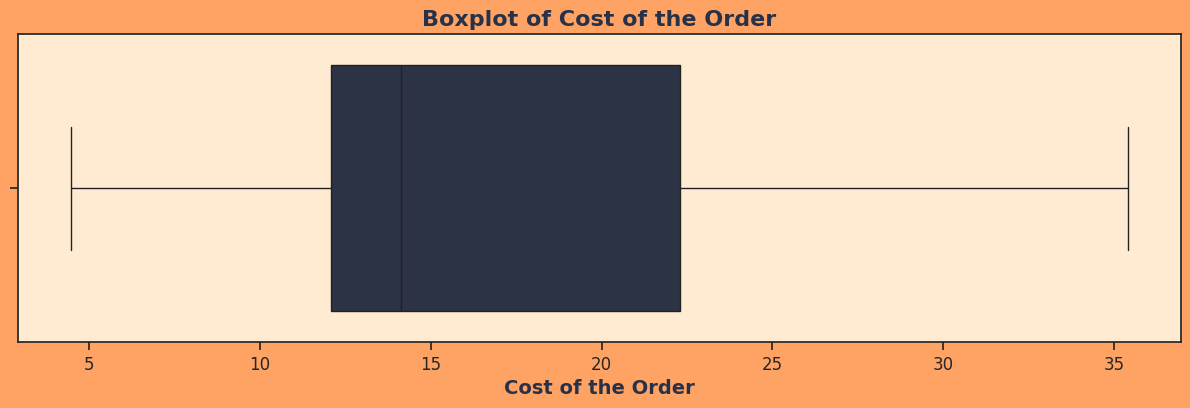

In [19]:
# Set style for the plot
sns.set(style="ticks")

# Set figure size for the histogram
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create the histogram with styling
histogram = sns.histplot(
    df['cost_of_the_order'],
    kde=True,  # Include kernel density estimation
    color='#273248',  # Bar color
    edgecolor='black'  # Add edges for clarity
)

# Add labels and title
histogram.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Distribution of Cost of the Order', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Cost of the Order', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# Set figure size for the boxplot
plt.figure(figsize=(15, 4))

# Create the boxplot with styling
boxplot = sns.boxplot(
    x=df['cost_of_the_order'],
    color='#273248'
)

# Add labels and title
boxplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Boxplot of Cost of the Order', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Cost of the Order', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.xticks(fontsize=12)

# Show the boxplot
plt.show()

#### Observations for Order Cost: 312 unique values with no missing. Lowest order cost is 4.47 dollars while the highest order cost is 35.41 dollars. The distribution of the data is right skewed with the mode demonstrating most orders costing around 10 to 13 dollars.

**Day of the Week**

In [20]:
explore_column(df, 'day_of_the_week')

Exploring column: day_of_the_week
Unique Values: 2
Missing Values: 0
Descriptive Stats:
 count        1898
unique          2
top       Weekend
freq         1351
Name: day_of_the_week, dtype: object
Value Counts:
 Weekend    1351
Weekday     547
Name: day_of_the_week, dtype: int64


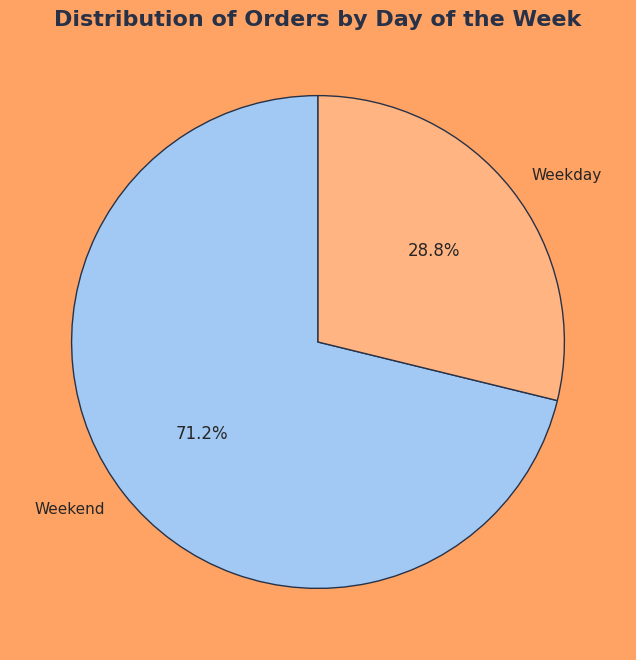

In [21]:
# Set figure size for the pie chart
plt.figure(figsize=(15, 8))

# Create the pie chart
pie_data = df['day_of_the_week'].value_counts()  # Count the occurrences of each day
plt.pie(
    pie_data,
    labels=pie_data.index,  # Set the labels to the days of the week
    autopct='%1.1f%%',  # Display percentages
    startangle=90,  # Start pie chart at 90 degrees
    colors=sns.color_palette('pastel'),  # Use pastel color palette
    wedgeprops={'edgecolor': '#273248'}  # Set edge color of the wedges
)

# Add title
plt.title('Distribution of Orders by Day of the Week', fontsize=16, fontweight='bold', color='#273248')  # Title styling

# Set background color for the entire figure
plt.gcf().set_facecolor('#FFA364')

# Show the pie chart
plt.show()

#### Observations Day of the Week: Only 2 unique values for day of the week, 'Weekday' and 'Weekend' with Weekend being the most frequent at 71.2% and Weekday being 28.8%

**Rating**

In [22]:
explore_column(df, 'rating')

Exploring column: rating
Unique Values: 3
Missing Values: 736
Descriptive Stats:
 count    1162.000000
mean        4.344234
std         0.741478
min         3.000000
25%         4.000000
50%         5.000000
75%         5.000000
max         5.000000
Name: rating, dtype: float64
Value Counts:
 5.0    588
4.0    386
3.0    188
Name: rating, dtype: int64


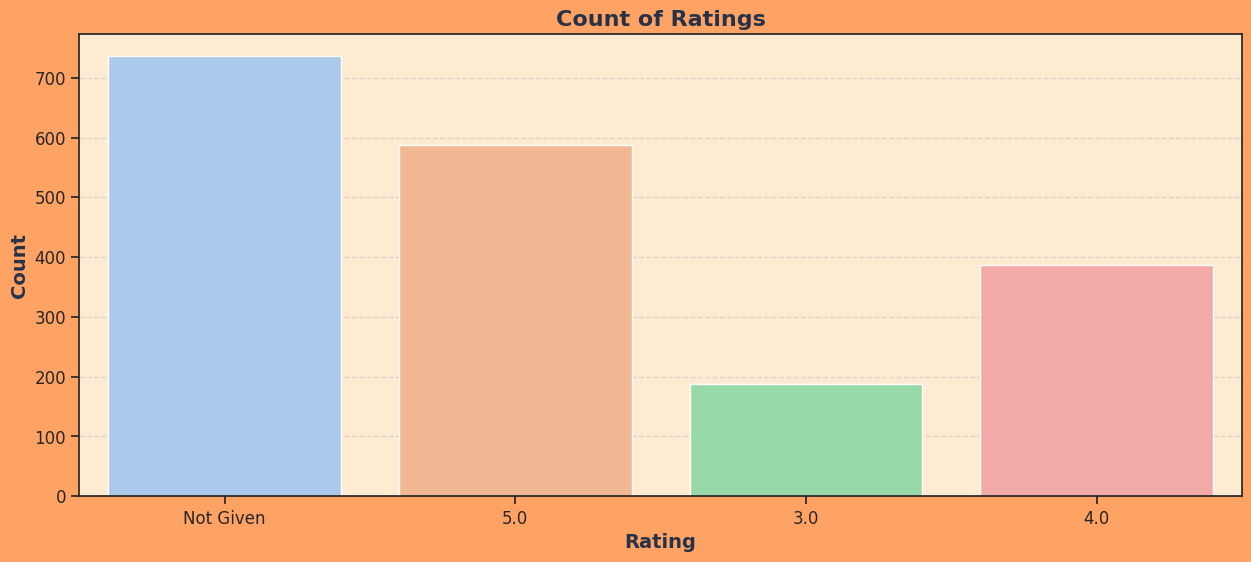

In [23]:
# Set style for the plot
sns.set(style="ticks")

# Set figure size for the countplot
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Replace NaN with a label for visualization purposes
df['rating_with_nan'] = df['rating'].fillna('Not Given')

# Create the countplot with styling
countplot = sns.countplot(
    data=df,
    x='rating_with_nan',
    hue='rating_with_nan',  # Assign the same variable to hue
    palette='pastel',  # Use a pastel color palette
    dodge=False,  # Ensure bars are not separated by hue
    legend=False  # Suppress the redundant legend
)

# Add labels and title
countplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Count of Ratings', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Rating', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Count', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Observations Rating: 3 unique values of '5', '4' and '3' with 736 orders without a rating, 'Not Given'. Average given rating is 4.34.

**Food Preparation Time**

In [24]:
explore_column(df, 'food_preparation_time')

Exploring column: food_preparation_time
Unique Values: 16
Missing Values: 0
Descriptive Stats:
 count    1898.000000
mean       27.371970
std         4.632481
min        20.000000
25%        23.000000
50%        27.000000
75%        31.000000
max        35.000000
Name: food_preparation_time, dtype: float64
Value Counts:
 21    135
23    123
27    123
22    123
28    121
24    121
20    119
30    119
33    118
35    117
Name: food_preparation_time, dtype: int64


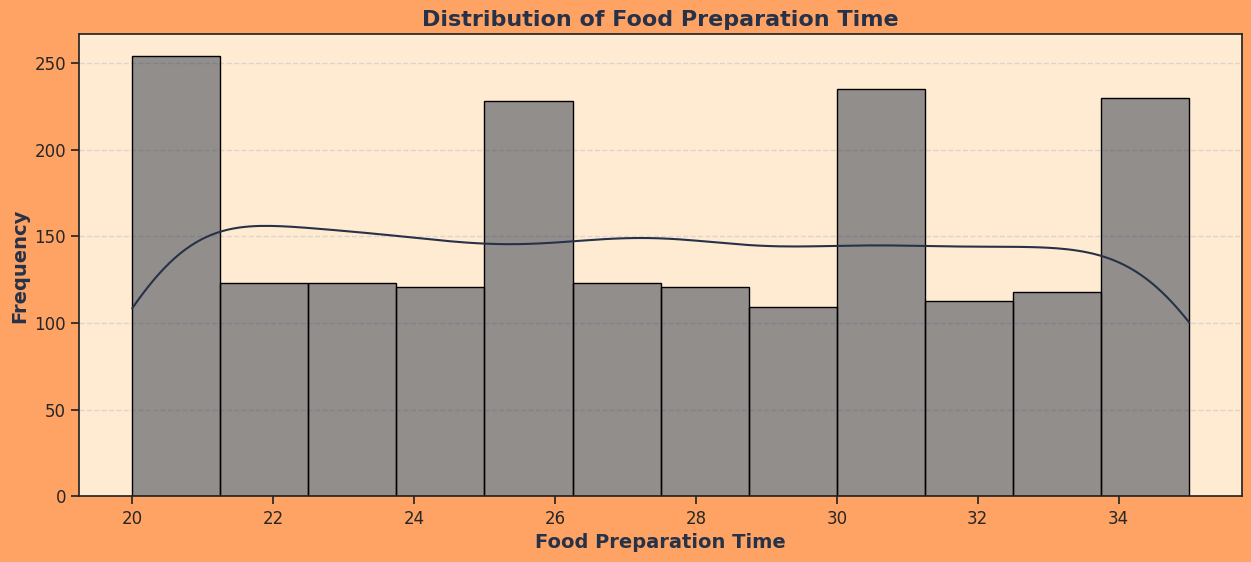

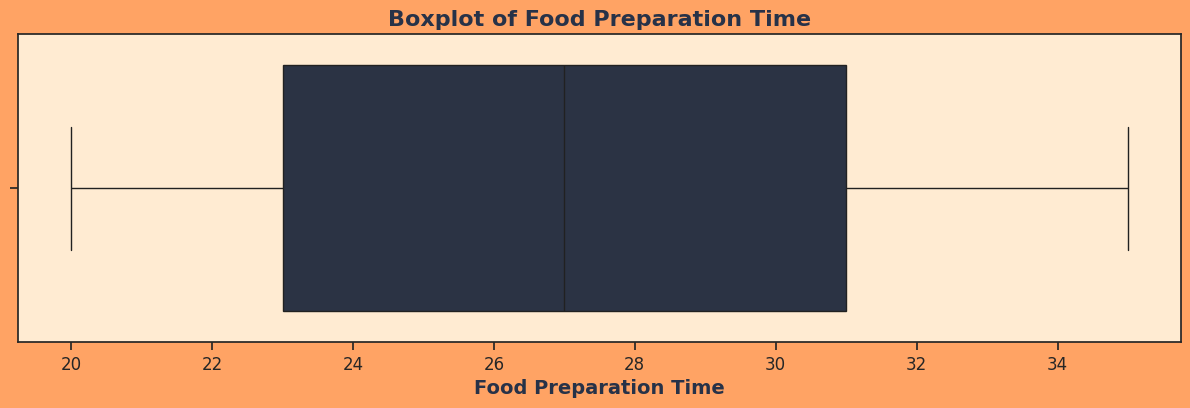

In [25]:
# Set style for the plot
sns.set(style="ticks")

# Set figure size for the histogram
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create the histogram with styling
histogram = sns.histplot(
    df['food_preparation_time'],
    kde=True,  # Include kernel density estimation
    color='#273248',  # Bar color
    edgecolor='black'  # Add edges for clarity
)

# Add labels and title
histogram.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Distribution of Food Preparation Time', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Food Preparation Time', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# Set figure size for the boxplot
plt.figure(figsize=(15, 4))

# Create the boxplot with styling
boxplot = sns.boxplot(
    x=df['food_preparation_time'],
    color='#273248'
)

# Add labels and title
boxplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Boxplot of Food Preparation Time', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Food Preparation Time', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.xticks(fontsize=12)

# Show the boxplot
plt.show()

#### Observations Food Preparation Time: Average food preparation time is 27.37 minutes with the least amount of time being 20 minutes and the most amount of time being 35 minutes. Distribution of time appears symmetrical, between 20 and 35 minutes.

**Delivery Time**

In [26]:
explore_column(df, 'delivery_time')

Exploring column: delivery_time
Unique Values: 19
Missing Values: 0
Descriptive Stats:
 count    1898.000000
mean       24.161749
std         4.972637
min        15.000000
25%        20.000000
50%        25.000000
75%        28.000000
max        33.000000
Name: delivery_time, dtype: float64
Value Counts:
 24    162
28    148
29    148
26    141
27    138
30    133
25    120
19     90
16     90
20     88
Name: delivery_time, dtype: int64


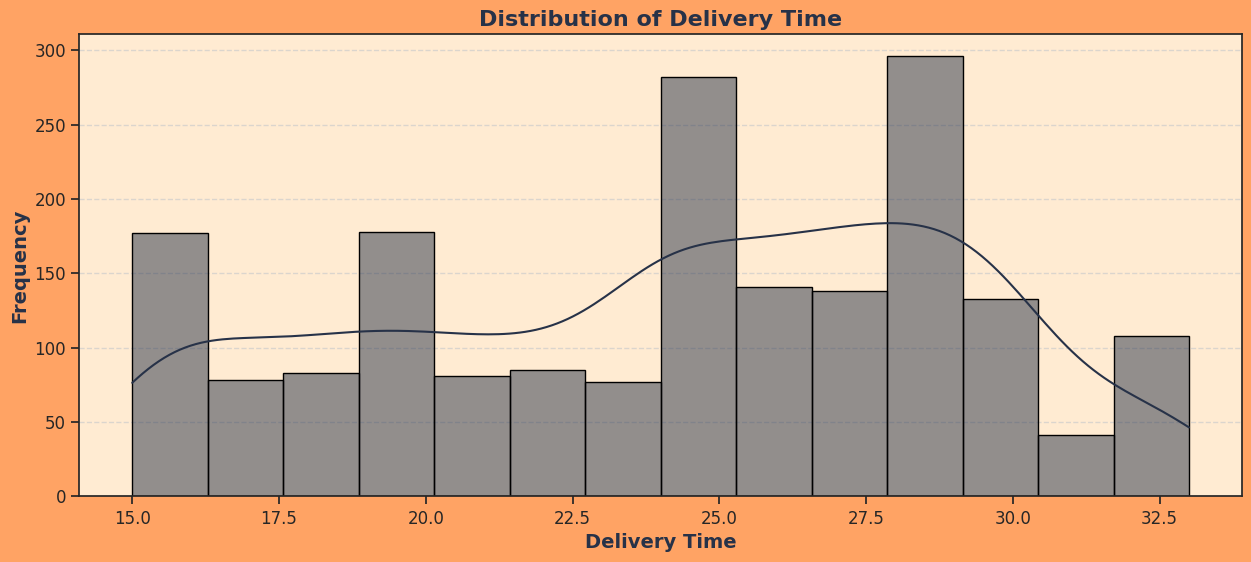

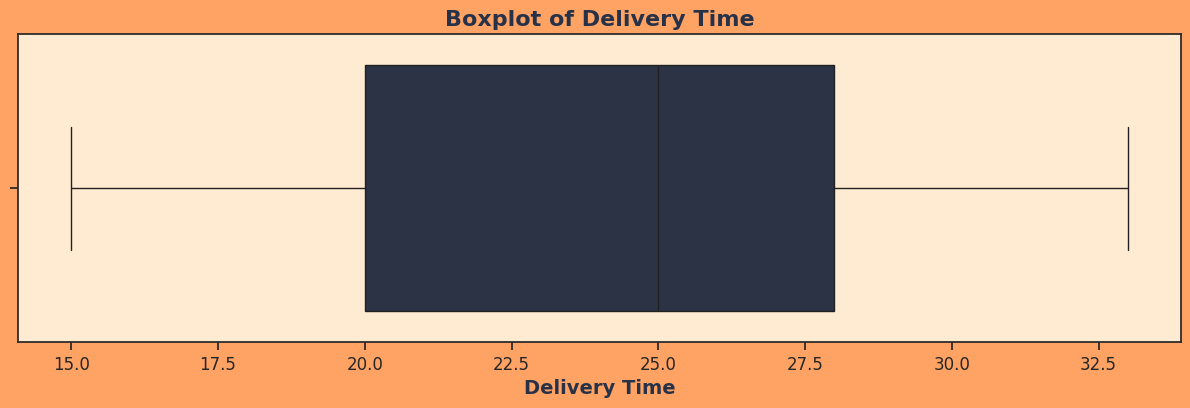

In [27]:
# Set style for the plot
sns.set(style="ticks")

# Set figure size for the histogram
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create the histogram with styling
histogram = sns.histplot(
    df['delivery_time'],
    kde=True,  # Include kernel density estimation
    color='#273248',  # Bar color
    edgecolor='black'  # Add edges for clarity
)

# Add labels and title
histogram.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Distribution of Delivery Time', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Delivery Time', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Frequency', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the histogram
plt.show()

# Set figure size for the boxplot
plt.figure(figsize=(15, 4))

# Create the boxplot with styling
boxplot = sns.boxplot(
    x=df['delivery_time'],
    color='#273248'
)

# Add labels and title
boxplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Boxplot of Delivery Time', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Delivery Time', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.xticks(fontsize=12)

# Show the boxplot
plt.show()

#### Observations Delivery Time: Average delivery time is 24.16 minutes. Fastest delivery time is 15 minutes and the longest being 33 minutes. The distribution is left-skewed.

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [28]:
# Count the number of orders for each restaurant and display the top 5 most frequently ordered from restaurants
df['restaurant_name'].value_counts().head(5)

,restaurant_name
Shake Shack,219
The Meatball Shop,132
Blue Ribbon Sushi,119
Blue Ribbon Fried Chicken,96
Parm,68


#### Observations: 5 most popular restaurants in this order: Shake Shack, The Meatball Shop, Blue Ribbon Sushi, Blue Ribbon Fried Chicken, and the Parm. Top 5 restaurants account for approximately 30% of orders.


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [29]:
# Most popular cuisine on weekends
df_weekend = df[df['day_of_the_week'] == 'Weekend']   # Filter rows where the day is 'Weekend'
df_weekend['cuisine_type'].value_counts()             # Find the most frequent cuisine

,cuisine_type
American,415
Japanese,335
Italian,207
Chinese,163
Mexican,53
Indian,49
Mediterranean,32
Middle Eastern,32
Thai,15
French,13


#### Observations: Most popular cuisine on the wekends is American


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [30]:
# Calculate the total number of orders
total_orders = len(df)

# Calculate the number of orders with cost greater than 20
orders_above_20 = len(df[df['cost_of_the_order'] > 20])

# Calculate the percentage
percentage_above_20 = (orders_above_20 / total_orders) * 100

# Display the result
print(f"The number of orders costing more than $20: {orders_above_20}")
print(f"Percentage of orders costing more than $20: {percentage_above_20:.2f}%")

The number of orders costing more than $20: 555
Percentage of orders costing more than $20: 29.24%


#### Observations: The number of orders costing more that $20 is 555 and the total percentage out of all orders is 29.24%


### **Question 10**: What is the mean order delivery time? [1 mark]

In [31]:
# Calculate the mean delivery time
mean_delivery_time = df['delivery_time'].mean()

# Display the result
print(f"The mean order delivery time is: {mean_delivery_time:.2f} minutes")

The mean order delivery time is: 24.16 minutes


#### Observations: Mean order delivery time is 24.16 minutes.


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [32]:
# Count the number of orders for each customer and display the top 3 most frequent customers
df['customer_id'].value_counts().head(3)

,customer_id
52832,13
47440,10
83287,9


#### Observations: The top 3 customers are

1.   # 52832 - 13 orders
2.   # 474402 - 10 orders
3.   # 83287 - 9 orders




### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


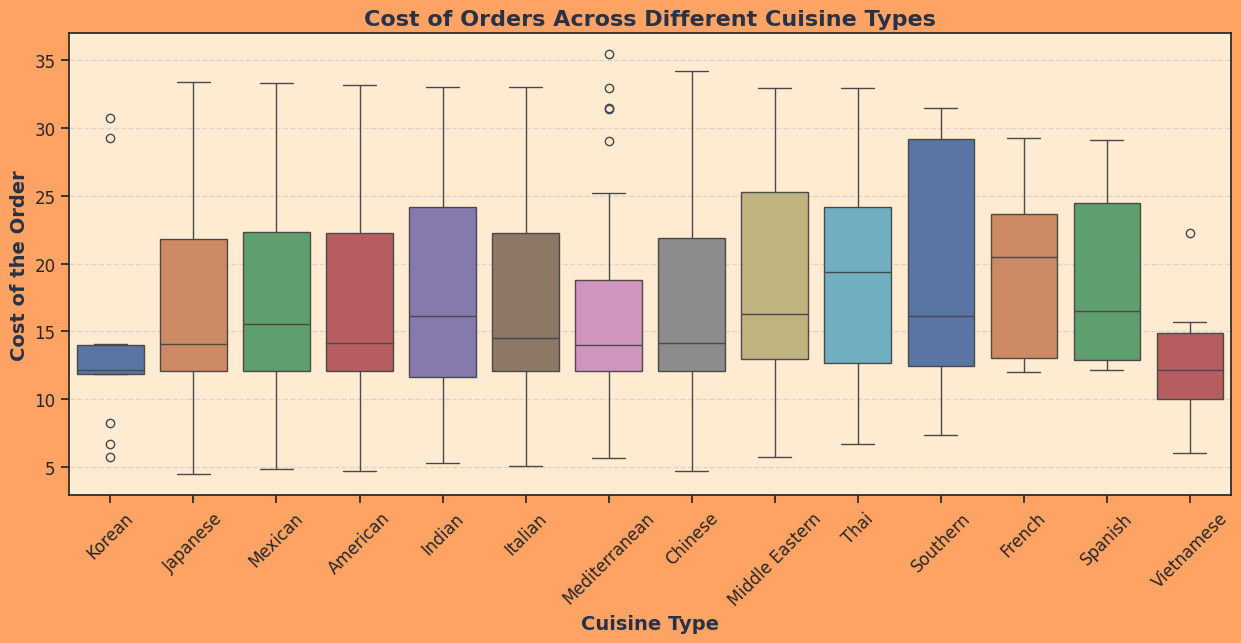

Aggregated Statistics for Cost of the Order by Cuisine Type:
                     mean  median       std
cuisine_type                               
French          19.793889  20.470  6.508990
Southern        19.300588  16.110  7.966032
Thai            19.207895  19.350  7.579149
Spanish         18.994167  16.520  6.658207
Middle Eastern  18.820612  16.300  8.086499
Mexican         16.933117  15.570  7.555108
Indian          16.919726  16.150  7.897493
Italian         16.418691  14.480  7.268831
American        16.319829  14.120  7.462290
Chinese         16.305209  14.120  7.631503
Japanese        16.304532  14.070  7.422722
Mediterranean   15.474783  13.995  7.604720
Korean          14.001538  12.180  7.563540
Vietnamese      12.882857  12.130  5.319623


In [33]:
# Set the style for the plot
sns.set(style="ticks")

# Set figure size for the boxplot
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create a boxplot to analyze the relationship between cuisine type and cost of the order
boxplot = sns.boxplot(
    data=df,
    x='cuisine_type',
    y='cost_of_the_order',
    hue='cuisine_type',
    dodge=False,
    legend=False,
    palette='deep'
)

# Add labels and title
boxplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Cost of Orders Across Different Cuisine Types', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Cuisine Type', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Cost of the Order', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(rotation=45, fontsize=12)
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate aggregated statistics
agg_stats = df.groupby('cuisine_type')['cost_of_the_order'].agg(['mean', 'median', 'std']).sort_values(by='mean', ascending=False)

# Display the aggregated statistics
print("Aggregated Statistics for Cost of the Order by Cuisine Type:")
print(agg_stats)

#### Observations: Thai and Fench are the cuisines that cost the most per order and Korean plus Vietnamese cost the least. There are some outliers, for Korean, Mediterranean and Vietnamese cuisine. Southern cuisine has the largest cost spread where Korean has the smallest.

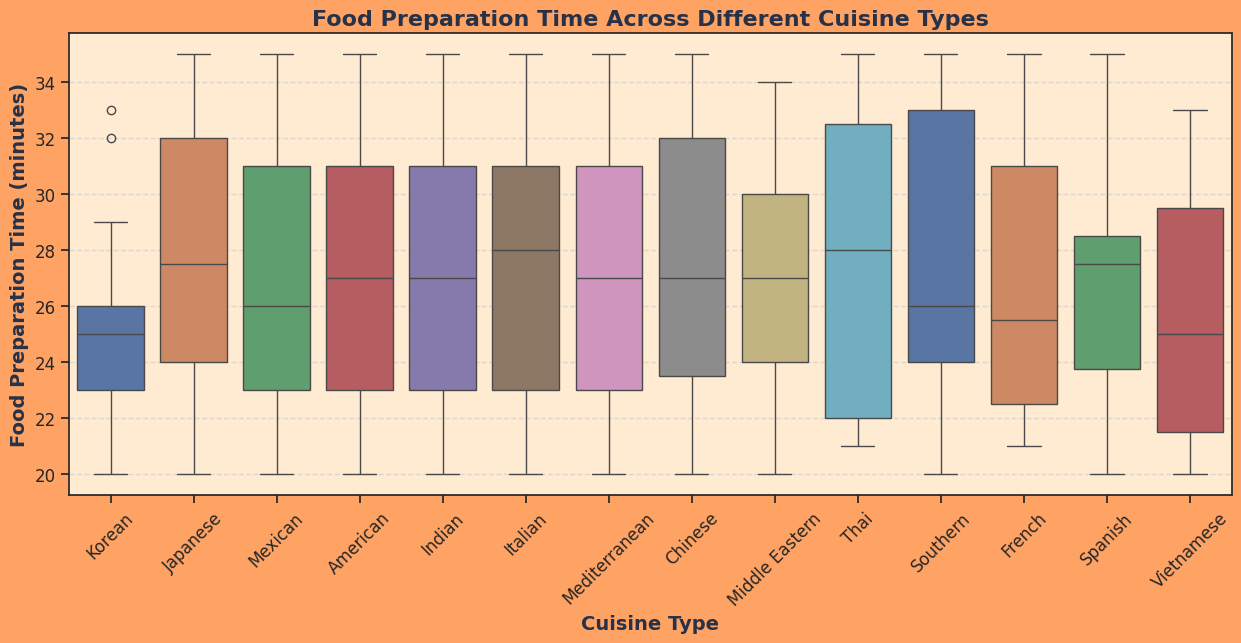

Aggregated Statistics for Food Preparation Time by Cuisine Type:
                     mean  median       std
cuisine_type                               
Southern        27.588235    26.0  5.523346
Chinese         27.511628    27.0  4.758525
Japanese        27.510638    27.5  4.604496
Italian         27.483221    28.0  4.519474
American        27.440068    27.0  4.658474
Thai            27.315789    28.0  5.498006
Indian          27.109589    27.0  4.620491
Mediterranean   27.000000    27.0  4.908043
Spanish         26.916667    27.5  4.501683
French          26.888889    25.5  5.039712
Mexican         26.727273    26.0  4.604450
Middle Eastern  26.673469    27.0  4.012417
Vietnamese      25.714286    25.0  5.154748
Korean          25.461538    25.0  3.971049


In [34]:
# Set the style for the plot
sns.set(style="ticks")

# Set figure size for the boxplot
plt.figure(figsize=(15, 6))  # Adjust width and height as needed

# Create a boxplot to analyze the relationship between cuisine type and food preparation time
boxplot = sns.boxplot(
    data=df,
    x='cuisine_type',
    y='food_preparation_time',
    hue='cuisine_type',
    dodge=False,
    legend=False,
    palette='deep'
)

# Add labels and title
boxplot.set_facecolor('#FFEBD2')  # Set background color for the plot area
plt.gcf().set_facecolor('#FFA364')  # Set background color for the entire figure
plt.title('Food Preparation Time Across Different Cuisine Types', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Cuisine Type', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Food Preparation Time (minutes)', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Add gridlines
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

# Calculate aggregated statistics
agg_stats = (
    df.groupby('cuisine_type')['food_preparation_time']
    .agg(['mean', 'median', 'std'])
    .sort_values(by='mean', ascending=False)
)

# Display the aggregated statistics
print("Aggregated Statistics for Food Preparation Time by Cuisine Type:")
print(agg_stats)

#### Observations: Korean and Vietnamese take the least amount of time to prepare. Italian and Thai take the longest to prepare. Food preparation is consistent for the most part. An outlier exists for Korean cuisine.

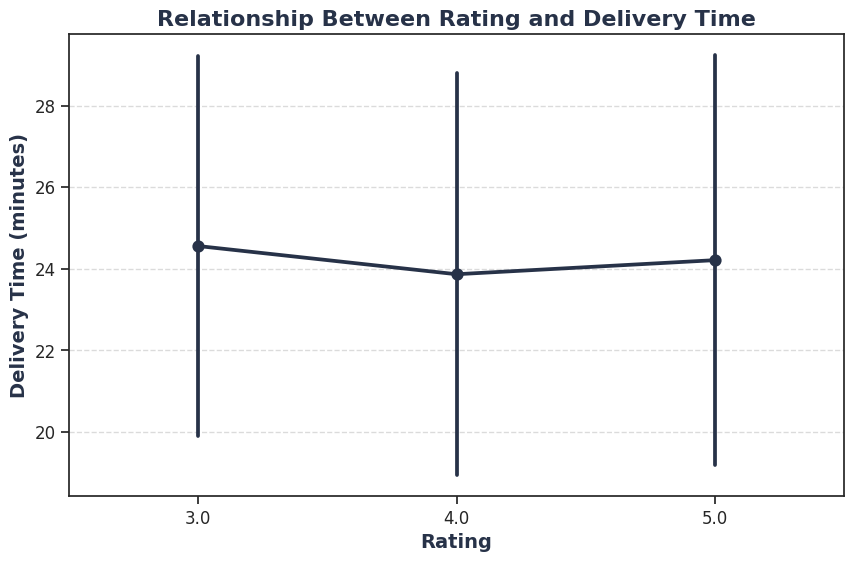

In [35]:
# Set the style for the plot
sns.set(style="ticks")

# Set figure size for the point plot
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Create the point plot
point_plot = sns.pointplot(
    data=df,
    x='rating',
    y='delivery_time',
    errorbar='sd',
    color='#273248',
    markers='o',
    linestyles='-'
)

# Add labels and title
plt.title('Relationship Between Rating and Delivery Time', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Rating', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Delivery Time (minutes)', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)  # Customize y-axis tick labels

# Add gridlines for readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Observations: There does not appear to be a strong relationship between the delivery time and the rating.

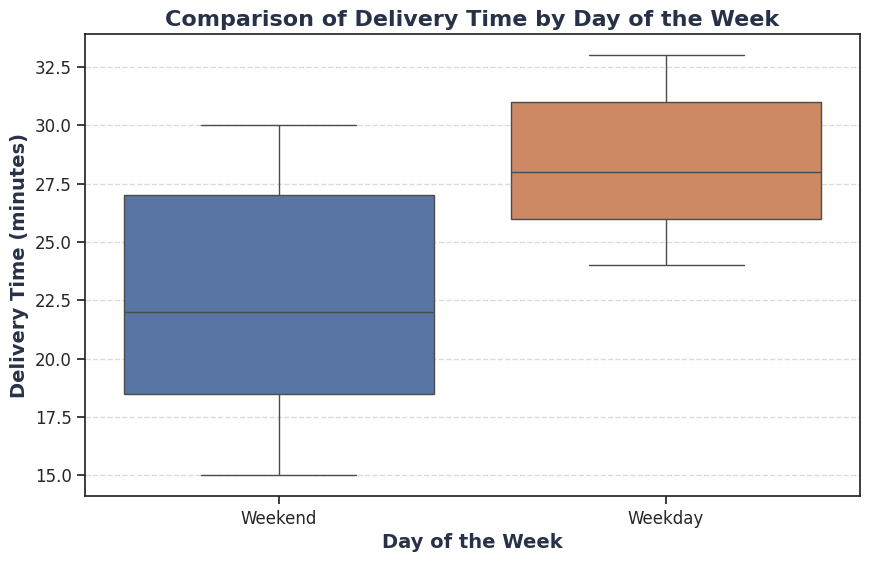

In [36]:
# Set the style for the plot
sns.set(style="ticks")

# Set figure size for the boxplot
plt.figure(figsize=(10, 6))  # Adjust size as needed

# Create the boxplot to compare day_of_the_week and delivery_time
boxplot = sns.boxplot(
    data=df,
    x='day_of_the_week',
    y='delivery_time',
    hue='day_of_the_week',
    dodge=False,
    legend=False,
    palette='deep'
)

# Add labels and title
plt.title('Comparison of Delivery Time by Day of the Week', fontsize=16, fontweight='bold', color='#273248')  # Title styling
plt.xlabel('Day of the Week', fontsize=14, fontweight='bold', color='#273248')  # X-axis label styling
plt.ylabel('Delivery Time (minutes)', fontsize=14, fontweight='bold', color='#273248')  # Y-axis label styling
plt.xticks(fontsize=12)  # Customize x-axis tick labels
plt.yticks(fontsize=12)  # Customize y-axis tick labels

# Add gridlines for better readability
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.show()

#### Observations: There is a visible difference between the delivery times on weekends vs. weekdays. It is possible that for weekends there are more resources available for delivery.

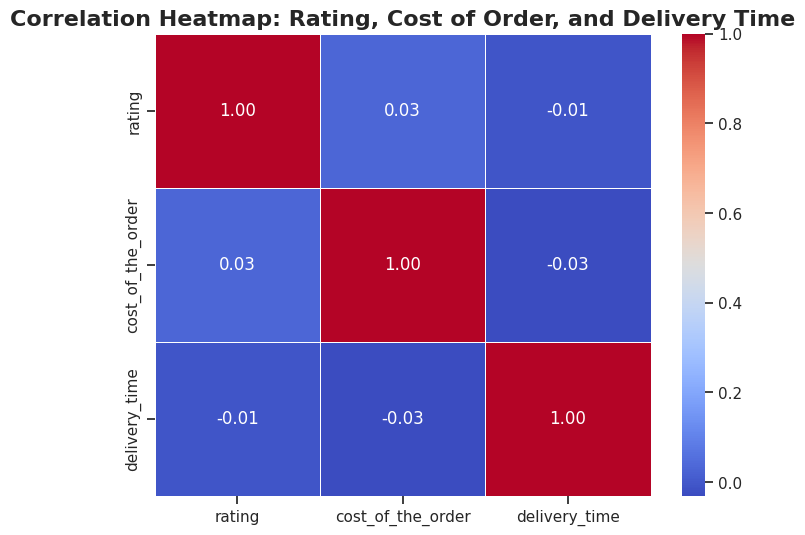

In [37]:
# Select the relevant columns
heatmap_data = df[['rating', 'cost_of_the_order', 'delivery_time']]

# Calculate the correlation matrix
correlation_matrix = heatmap_data.corr()

# Create the heatmap
plt.figure(figsize=(8, 6))  # Set figure size
sns.heatmap(
    correlation_matrix,
    annot=True,  # Display correlation values
    cmap='coolwarm',  # Colormap for visualization
    fmt='.2f',  # Format values to 2 decimal places
    linewidths=0.5  # Add lines between cells
)

# Add a title to the heatmap
plt.title('Correlation Heatmap: Rating, Cost of Order, and Delivery Time', fontsize=16, fontweight='bold')

# Show the plot
plt.show()

#### Observations: There appears to be no correlation between the cost of the order and delivery time with the rating.

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [38]:
# Group by restaurant_name and calculate rating count and average rating
restaurant_stats = df.groupby('restaurant_name')['rating'].agg(['count', 'mean']).reset_index()

# Filter restaurants with count > 50 and mean rating > 4
filtered_restaurants = restaurant_stats[(restaurant_stats['count'] > 50) & (restaurant_stats['mean'] > 4)]

# Display the results
print("Restaurants with more than 50 ratings and an average rating greater than 4:")
print(filtered_restaurants)


Restaurants with more than 50 ratings and an average rating greater than 4:
               restaurant_name  count      mean
20   Blue Ribbon Fried Chicken     64  4.328125
21           Blue Ribbon Sushi     73  4.219178
136                Shake Shack    133  4.278195
153          The Meatball Shop     84  4.511905


#### Observations: There are 4 restaurants that qualify for this promotional offer: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack' and 'The Meatball Shop'.


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

Lets generate a function to calculate the revenue:

In [39]:
# Define a function to calculate revenue for each order
def calculate_revenue(order_cost):
    if order_cost > 20:
        return order_cost * 0.25  # 25% revenue for orders > $20
    elif order_cost > 5:
        return order_cost * 0.15  # 15% revenue for orders > $5
    else:
        return 0  # No revenue for orders <= $5

Now let's calculate the revenue for each order and process:

In [40]:
# Apply the function to calculate revenue and create a new column
df['revenue'] = df['cost_of_the_order'].apply(calculate_revenue)

... and finally display:

In [41]:
# Calculate total net revenue
total_revenue = df['revenue'].sum()

# Display the DataFrame with the new 'revenue' column and the total revenue
print(df[['cost_of_the_order', 'revenue']])
print(f"\nTotal net revenue generated by the company: ${total_revenue:.2f}")

      cost_of_the_order  revenue
0                 30.75   7.6875
1                 12.08   1.8120
2                 12.23   1.8345
3                 29.20   7.3000
4                 11.59   1.7385
...                 ...      ...
1893              22.31   5.5775
1894              12.18   1.8270
1895              25.22   6.3050
1896              12.18   1.8270
1897              19.45   2.9175

[1898 rows x 2 columns]

Total net revenue generated by the company: $6166.30


#### Observations: Total revenue generated by the company is $ 6,166.30


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [42]:
# Calculate the total time required for each order
df['total_time'] = df['food_preparation_time'] + df['delivery_time']

# Calculate the number of orders that take more than 60 minutes
orders_above_60 = len(df[df['total_time'] > 60])

# Calculate the total number of orders
total_orders = len(df)

# Calculate the percentage of orders taking more than 60 minutes
percentage_above_60 = (orders_above_60 / total_orders) * 100

# Display the results
print(f"Percentage of orders taking more than 60 minutes: {percentage_above_60:.2f}%")


Percentage of orders taking more than 60 minutes: 10.54%


#### Observations: The percentage of orders taking more than 60 minutes to get delivered is 10.54%


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [43]:
# Group by 'day_of_the_week' and calculate the mean delivery time
mean_delivery_time = df.groupby('day_of_the_week')['delivery_time'].mean()

# Display the results
print("Mean Delivery Time by Day of the Week:")
print(mean_delivery_time)

# Optional: Display the difference in mean delivery times
weekday_mean = mean_delivery_time['Weekday']
weekend_mean = mean_delivery_time['Weekend']
difference = weekend_mean - weekday_mean

print(f"\nThe mean delivery time on weekdays is: {weekday_mean:.2f} minutes")
print(f"The mean delivery time on weekends is: {weekend_mean:.2f} minutes")
print(f"The difference in mean delivery time between weekends and weekdays is: {difference:.2f} minutes")


Mean Delivery Time by Day of the Week:
day_of_the_week
Weekday    28.340037
Weekend    22.470022
Name: delivery_time, dtype: float64

The mean delivery time on weekdays is: 28.34 minutes
The mean delivery time on weekends is: 22.47 minutes
The difference in mean delivery time between weekends and weekdays is: -5.87 minutes


#### Observations: There is a difference between the mean delivery time for weekdays vs. weekends. The weekday mean time for delivery is a little over 28 minutes while the mean time for delivery for weekends is just under 23 minutes. The difference is almost 6 minutes.


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  It must be noted that there are almost 39% of the orders that did not have a rating.
*  As far as ratings go, there are 3 unique values for ratings given, 5, 4 and 3 with no 2's or 1's.
*  The average rating given was 4.34.
*  Weekends are the most popular time for orders accounting for 71% of the orders.
*  Top restaurants by rating and number of orders are: 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack' and 'The Meatball Shop'.
*  Top cuisines by number of orders are American, Japanese, Italian and Chinese.
*  The average order delivery time is: 24.16 minutes
*  There is a clear difference in the delivery time between orders placed on weekdays vs orders placed on weekends. That difference is almost 6 minutes.
*  Thai and Fench are the cuisines that cost the most per order and Korean plus Vietnamese cost the least.
*  Average cost of an order is 16.50 dollars with most of the orders falling between 10 and 13 dollars.
*  Korean and Vietnamese take the least amount of time to prepare. Italian and Thai take the longest to prepare.
*  Total revenue generated by the company for the orders in the dataset is $ 6,166.30

### Recommendations:

*  It is recommended since 'ratings' are an important aspect of the data set that a committment be made to determine what can be done to improve the dataset through the reduction in missing ratings and implement a plan to reduce gap in data.
*  Foodhub should continue to provide incentives for top restaurants such as 'Blue Ribbon Fried Chicken', 'Blue Ribbon Sushi', 'Shake Shack' and 'The Meatball Shop' to continue to use Foodhub's service.
*  Foodhub should also consider marketing to grow offerings in top cuisines such as American, Japanese, Italian and Chinese.
*  Food preparation and delivery times are an integral part of the order and Foodhub should consider ways to incentivize improving times through resource planning and scheduling.
*  Also Foodhub should consider expanding data to include other characteristics of the order that potentially establish more correlation between ratings and characteristics of the order.

---